# Analyzing Socioeconomic Indicators in Chicago data-set with SQL and Python

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal. This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

Downloadable report or details of the dataset is available from Census data City of Chicago on their [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/about_data)

## whats in the Socioeconomic indicator in Chicago?

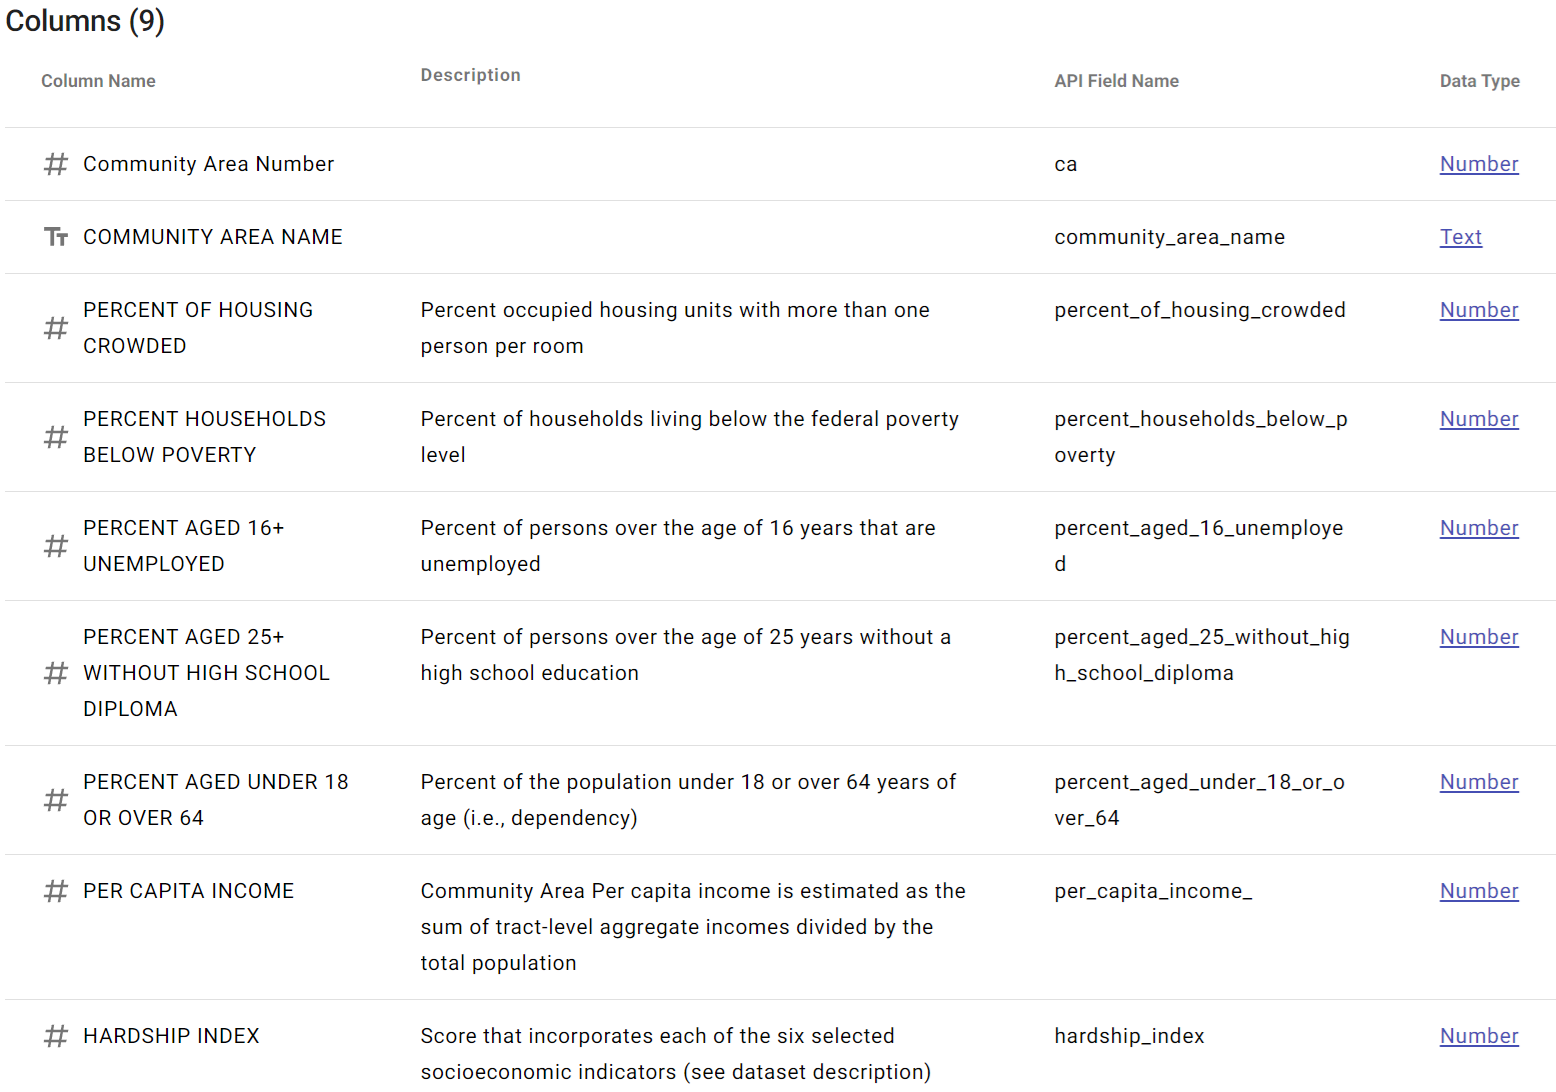

### connect to the databases 

In [6]:
%load_ext sql

In [7]:
import csv #file from the website is based on csv file
import sqlite3 
import pandas as pd

In [10]:
con_object = sqlite3.connect('socioeconomic.db') # connection to a database socioeconomic db by using connection object
cur_object = con_object.cursor()
!pip install -q pandas==1.1.5

%sql sqlite:///socioeconomic.db

'Connected: @socioeconomic.db'

### Store the dataset in a Table
In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet, including in this dataset presented by the city of Chicago. To analyze the data using SQL, the csv file first needs to be stored in the database.


In [13]:
df = pd.read_csv("https://data.cityofchicago.org/resource/jcxq-k9xf.csv")
df.to_sql("chicago_socioeconomic", con_object, if_exists ='replace', index = False , method = "multi")

### checking if the dataset is ready to use

In [15]:
%sql SELECT * FROM chicago_socioeconomic limit 6

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0


#### checking how many rows available in the dataset

In [17]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


#### checking hardship index greater than 50.0 community area in Chicago
checking how many community areas having a hardship above normal, which we can assume more than 50 ( the higher the hardship_index, the more they are having difficulty in life)

In [21]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic WHERE hardship_index > 50

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


checking what are these community areas that having hardship above 50, in relation to their capita income and their counterpart percentage of households below poverty

In [25]:
%sql SELECT community_area_name, per_capita_income_ ,percent_households_below_poverty FROM chicago_socioeconomic WHERE hardship_index >50

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_,percent_households_below_poverty
Albany Park,21323,19.2
Belmont Cragin,15461,18.7
Hermosa,15089,20.5
Humboldt park,13781,33.9
Austin,15957,28.6
West Garfield Park,10934,41.7
East Garfield Park,12961,42.4
North Lawndale,12034,43.1
South Lawndale,10402,30.7
Lower West Side,16444,25.8


It appears that all these 38 community areas have per capita income below 25000, with the highest hardship index from this community area as below: 

In [28]:
%sql SELECT community_area_name , hardship_index FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic)


 * sqlite:///socioeconomic.db
Done.


community_area_name,hardship_index
Riverdale,98.0


which means 98% of all people in Riverdale experiencing hardship in life

#### Community area in chicago that earn more than $60000 per year

According to the U.S. Bureau of Labor, the average U.S annunal salary in Q4 of 2024 was $59,484.
We will see how many community areas in Chicago earning as much as the average annual salary or above from the query below

In [34]:
%sql SELECT community_area_name, per_capita_income_, hardship_index FROM chicago_socioeconomic WHERE per_capita_income_ >= 60000

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_,hardship_index
Lake View,60058,5.0
Lincoln Park,71551,2.0
Near North Side,88669,1.0
Loop,65526,3.0


It is confirmed that one community area hardship is linked directly to their annual income, where as the community areas earning the same as natioal U.S average salary or above having a very low hardship index level

#### A more detailed correlation between annual income and their index level 
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. This library is imported to see more of the correlation between their income and hardship index. 

In this study, hardship index data is compared againts its per capita income and displayed into .joinplot() graph

In [38]:
#!pip install seaborn #uncomment in the environment where seaborn library package is not installed

In [39]:
import seaborn
import matplotlib

 * sqlite:///socioeconomic.db
Done.


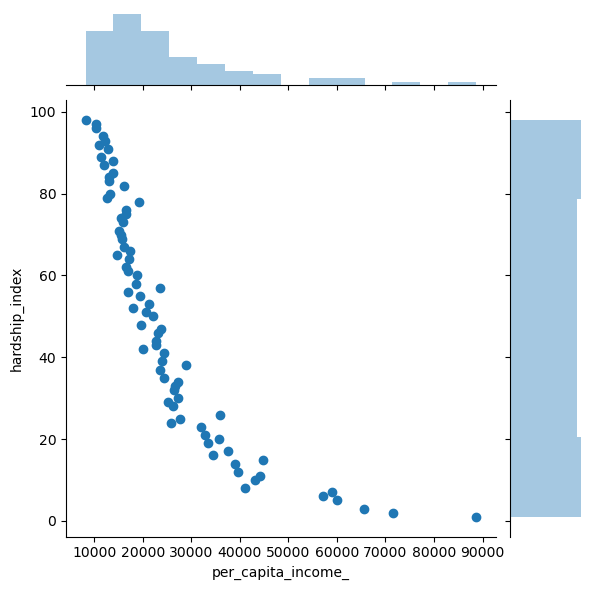

In [41]:
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = seaborn.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

We can see that as the Hardship Index rises as per capita income  decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 

#### A relation between education and their income

 * sqlite:///socioeconomic.db
Done.


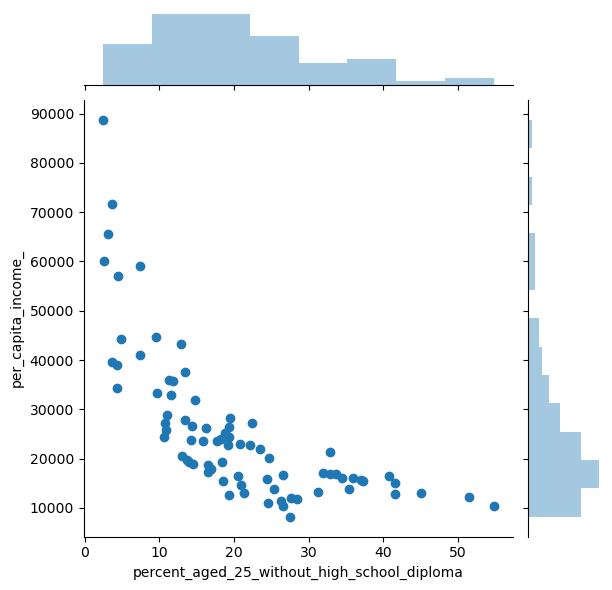

In [54]:
income_vs_education = %sql SELECT per_capita_income_ , percent_aged_25_without_high_school_diploma FROM chicago_socioeconomic
plot2 = seaborn.jointplot(x='percent_aged_25_without_high_school_diploma',y='per_capita_income_', data=income_vs_education.DataFrame())

Similar to previous graph, we can see that as the percent without high school diploma rises the capita income averaging below average $ 60000 average income. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables.

 * sqlite:///socioeconomic.db
Done.


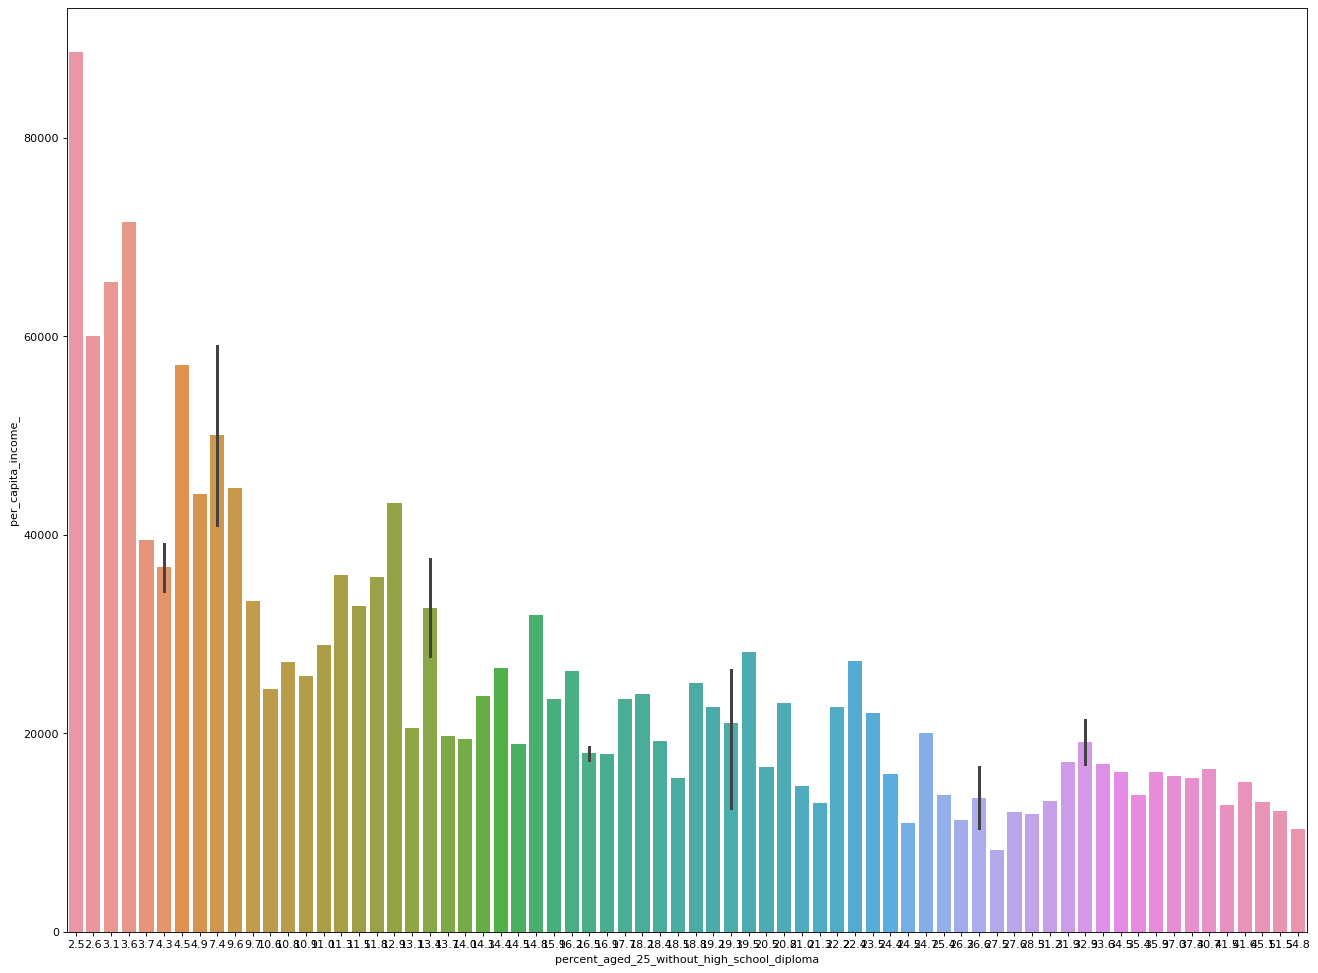

In [61]:
from matplotlib.pyplot import figure
income_vs_education= %sql SELECT per_capita_income_ , percent_aged_25_without_high_school_diploma FROM chicago_socioeconomic
figure(num=None, figsize=(20,15), dpi=80, facecolor='w', edgecolor='r')
plot2 = seaborn.barplot(x='percent_aged_25_without_high_school_diploma',y='per_capita_income_', data=income_vs_education.DataFrame())

Above is individual community area with its percentage of its resident aged at least 25 without high school diploma. The area where the highest per capita income is having the lowest percentage of adults not having a high school diploma. This community area is:

In [67]:
%sql select community_area_name , per_capita_income_, percent_aged_25_without_high_school_diploma FROM chicago_socioeconomic where per_capita_income_ = (SELECT MAX (per_capita_income_)FROM chicago_socioeconomic)

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_,percent_aged_25_without_high_school_diploma
Near North Side,88669,2.5


## Summary
In this study I have stored a real world data set from the City of Chicago dataset about their scoring on socioeconomic in a database, gain insights into data using SQL queries and then also visualized a portion of the data in the database to see what story it tells.

## Author
​
<a href="https://www.linkedin.com/in/ryazania-utami-95079151" target="_blank">Ryazania Utami</a>
​